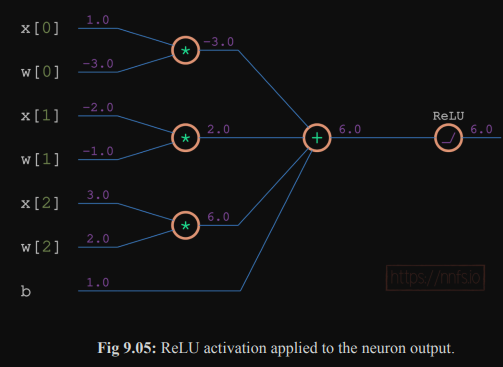

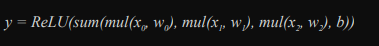

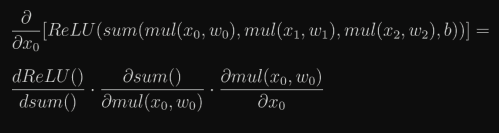

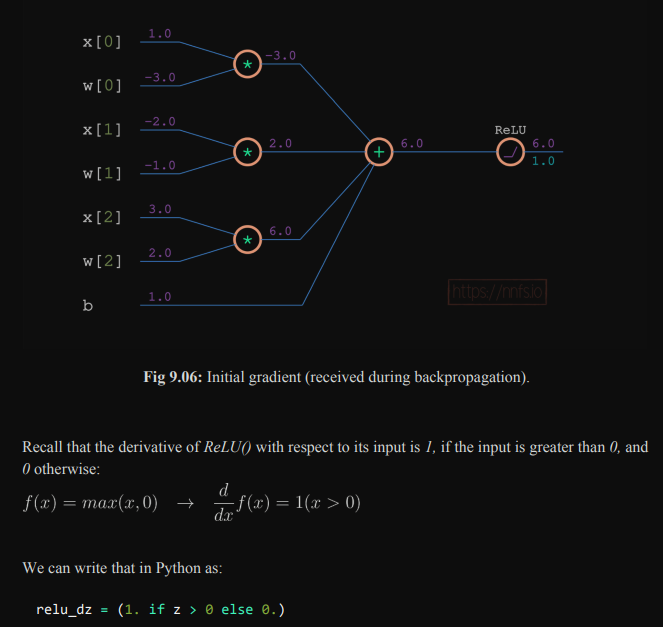

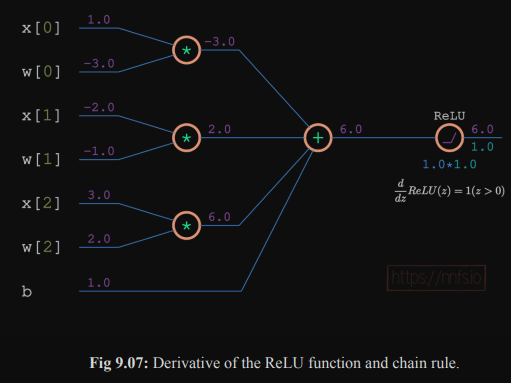

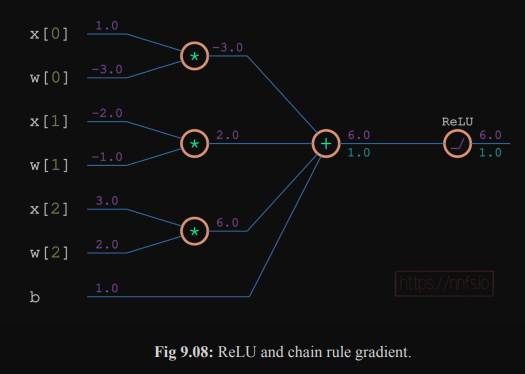

In [1]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

# Backward pass

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

1.0


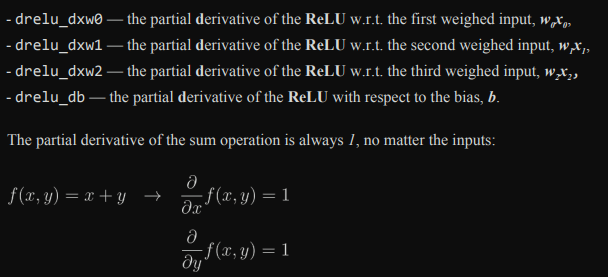

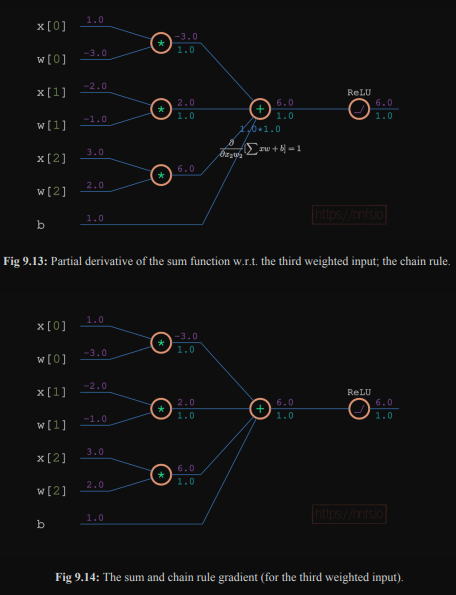

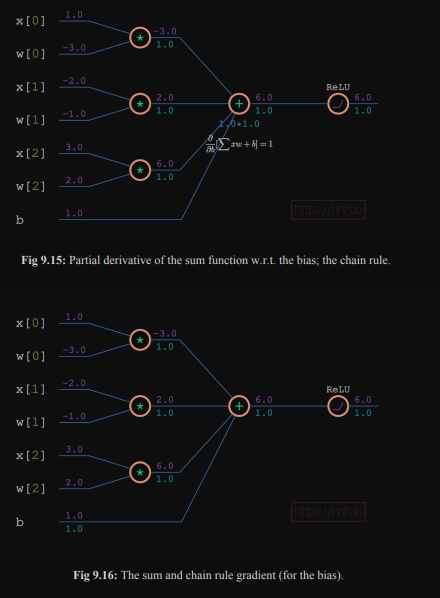

In [2]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

# Backward pass

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)

print(drelu_dz)

# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1

drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)


1.0
1.0 1.0 1.0 1.0


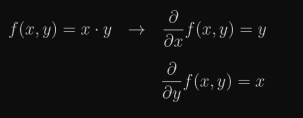

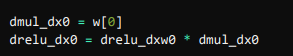

In [3]:
# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * dmul_dx0
print(drelu_dx0)

-3.0


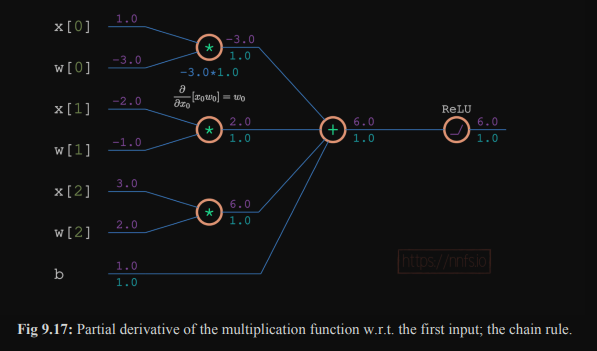

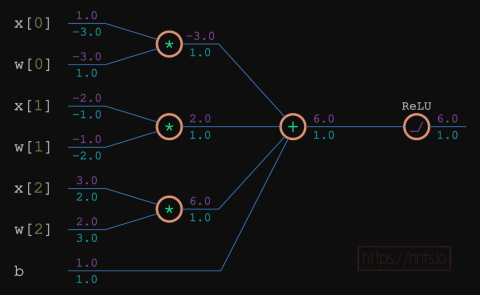

In [4]:
# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2
print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)


-3.0 1.0 -1.0 -2.0 2.0 3.0


# Gradient (Partial Derivative)

In [19]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs
dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights
db = drelu_db # gradient on bias


In [20]:
print(w, b) # weights and bias

[-3.0059999999999993, -0.988, 1.9820000000000007] 0.994


In [29]:
w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db

print(w,b)

# Adding
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

print(y) # 6 to 5.985


[-3.0149999999999983, -0.97, 1.9550000000000016] 0.985
5.985


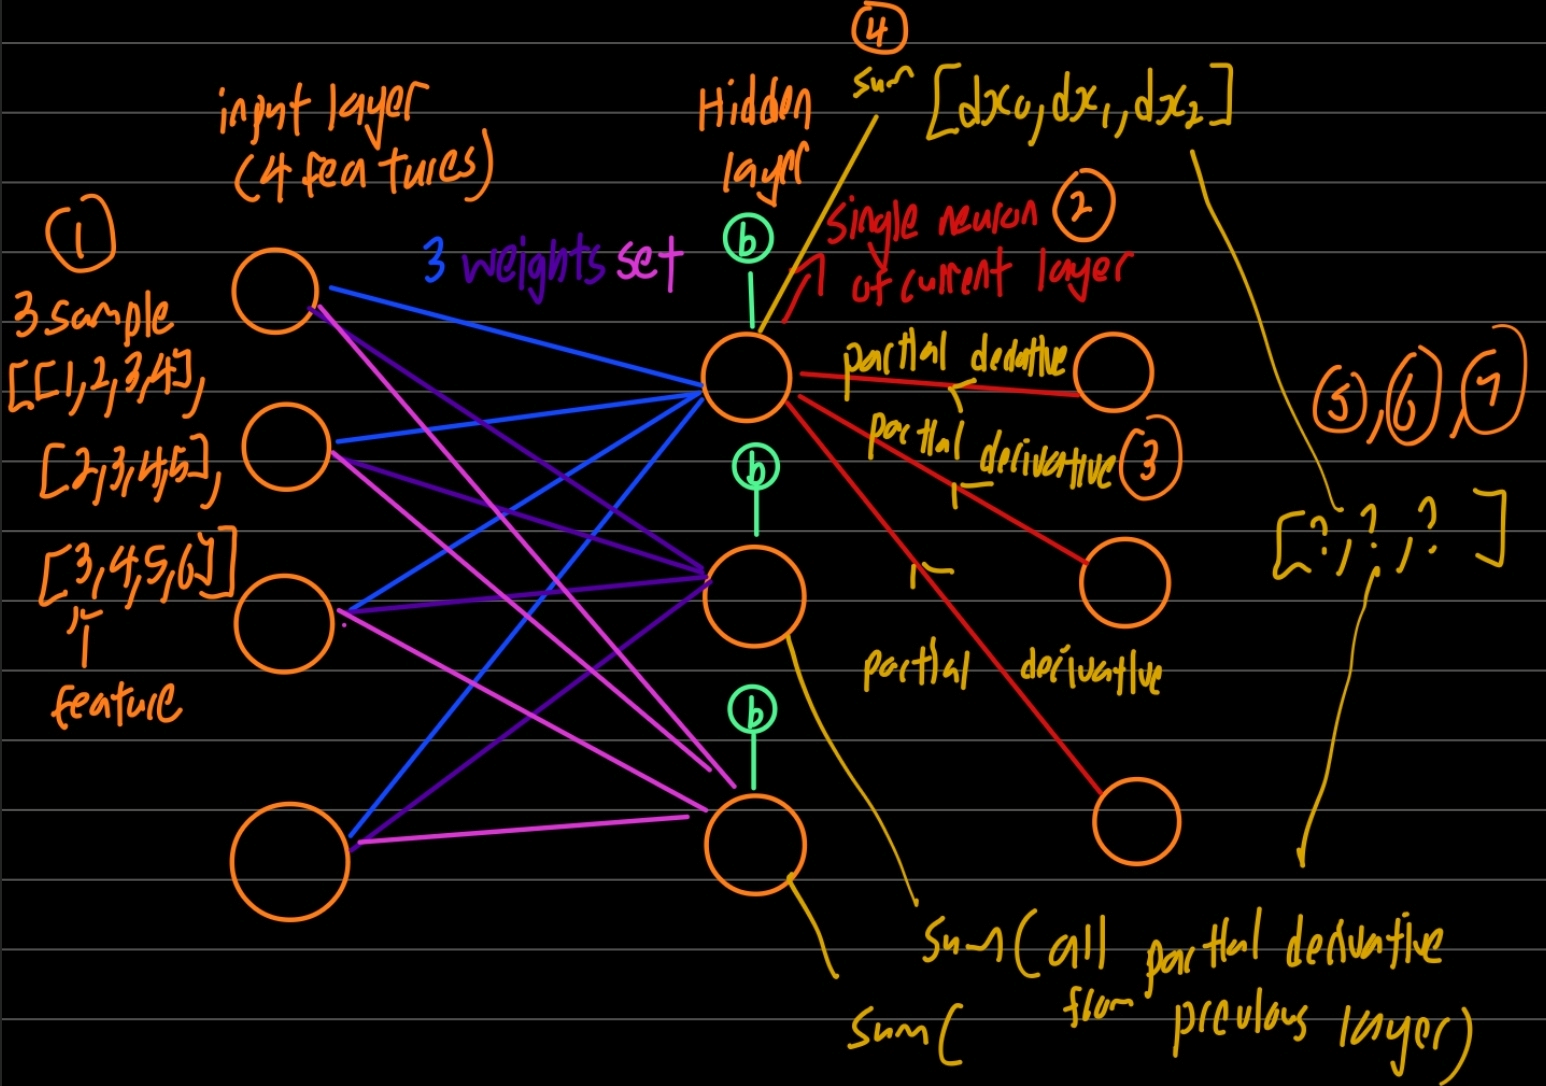

1. To begin, let’s set a list of 3 samples for input, where each sample consists of 4 features.
For this example, our network will consist of a single hidden layer, containing 3 neurons (lists of
3 weight sets and 3 biases).
2. A single neuron of the current layer connects to all of them — they all receive the output
of this neuron. 
3. What will happen during backpropagation? Each neuron from the next layer will return a partial derivative of its function with respect to this input. The neuron in the current layer will receive a vector consisting of these derivatives.
4. We need this to be a singular value for a singular neuron. To continue backpropagation, we need to sum this vector.
5. Now, let’s replace the current singular neuron with a layer of neurons. As opposed to a single neuron, a layer outputs a vector of values instead of a singular value. Each neuron in a layer
connects to all of the neurons in the next layer. During backpropagation, each neuron from the
current layer will receive a vector of partial derivatives the same way that we described for a
single neuron. 
6. With a layer of neurons, it’ll take the form of a list of these vectors, or a 2D array.
We know that we need to perform a sum, but what should we sum and what is the result supposed
to be? 
7. Each neuron is going to output a gradient of the partial derivatives with respect to all of its
inputs, and all neurons will form a list of these vectors. We need to sum along the inputs — the
first input to all of the neurons, the second input, and so on. We’ll have to sum columns.
8. To calculate the partial derivatives with respect to inputs, we need the weights — the partial
derivative with respect to the input equals the related weight. This means that the array of partial derivatives with respect to all of the inputs equals the array of weights. 



In [9]:
import numpy as np
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]).T
print(weights.T)

# sum weights of given input
# and multiply by the passed in gradient for this neuron
dinputs = np.dot(dvalues[0], weights.T) # same as
dinputs = np.dot(weights, dvalues[0])

print(dinputs)


[[ 0.2   0.8  -0.5   1.  ]
 [ 0.5  -0.91  0.26 -0.5 ]
 [-0.26 -0.27  0.17  0.87]]
[ 0.44 -0.38 -0.07  1.37]


### A Batch of samples

In [10]:
import numpy as np
# Passed in gradient from the next layer
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T


# sum weights of given input
# and multiply by the passed in gradient for this neuron

# the derivative of the neuron with respect to inputs
dinputs = np.dot(dvalues, weights.T)
print(dinputs)


[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


In [11]:
import numpy as np

# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
                    [2., 5., -1., 2],
                    [-1.5, 2.7, 3.3, -0.8]])

# sum weights of given input
# and multiply by the passed in gradient for this neuron

# the derivative of the neuron with respect to weights
dweights = np.dot(inputs.T, dvalues)
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


In [12]:
import numpy as np
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])

# dbiases - sum values, do this over samples (first axis), keepdims
dbiases = np.sum(dvalues, axis=0, keepdims=True) # keepdims lets us keep the gradient as a row vector
print(dbiases)

[[6. 6. 6.]]


In [13]:
import numpy as np

# Example layer output
z = np.array([[1, 2, -3, -4],
                [2, -7, -1, 3],
                [-1, 2, 5, -1]])
# derivative of the loss function with respect to the output of the ReLU activation 
dvalues = np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12]])

# ReLU activation's derivative
drelu = np.zeros_like(z)
drelu[z > 0] = 1
print(drelu)

# The chain rule
drelu *= dvalues
print(drelu)


[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


In [14]:
import numpy as np

# Example layer output
z = np.array([[1, 2, -3, -4],
                [2, -7, -1, 3],
                [-1, 2, 5, -1]])

dvalues = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]])

# ReLU activation's derivative
# with the chain rule applied
drelu = dvalues.copy()
drelu[z <= 0] = 0
print(drelu)


[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


### ALl the derivatives

In [15]:
import numpy as np

# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
                    [2., 5., -1., 2],
                    [-1.5, 2.7, 3.3, -0.8]])

# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])

# Forward pass
layer_outputs = np.dot(inputs, weights) + biases # Dense layer

relu_outputs = np.maximum(0, layer_outputs) # ReLU activation

# Let's optimize and test backpropagation here
# ReLU activation - simulates derivative with respect to input values
# from next layer passed to current layer during backpropagation
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0

# Dense layer

# dinputs - multiply by weights
dinputs = np.dot(drelu, weights.T)

# dweights - multiply by inputs
dweights = np.dot(inputs.T, drelu)

# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(drelu, axis=0, keepdims=True)

# Update parameters
weights += -0.001 * dweights
biases += -0.001 * dbiases
print(weights)
print(biases)

[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]
